Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

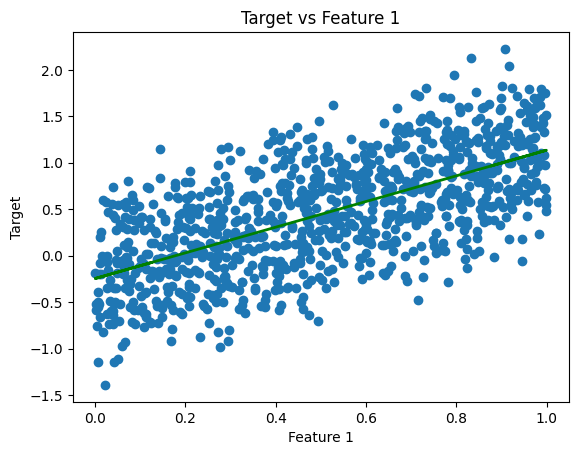

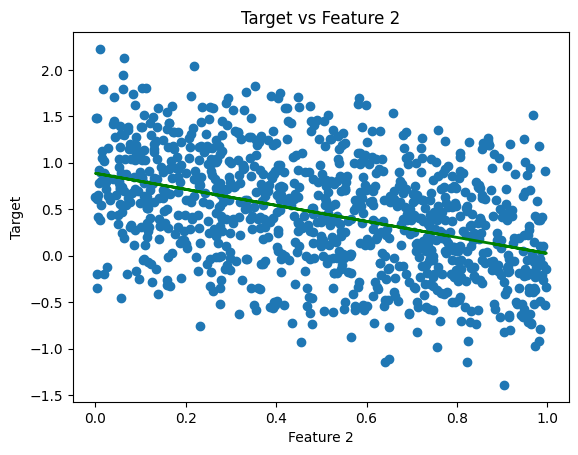

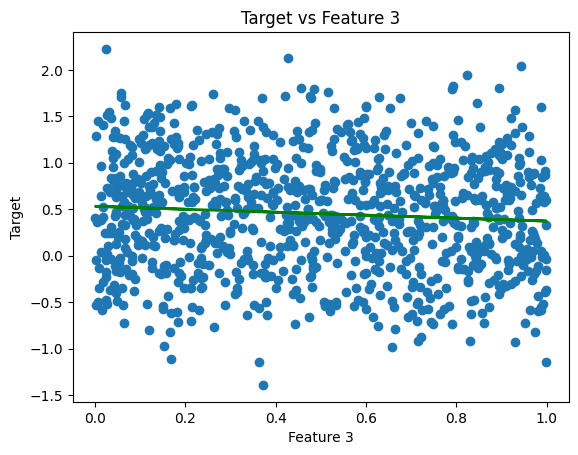

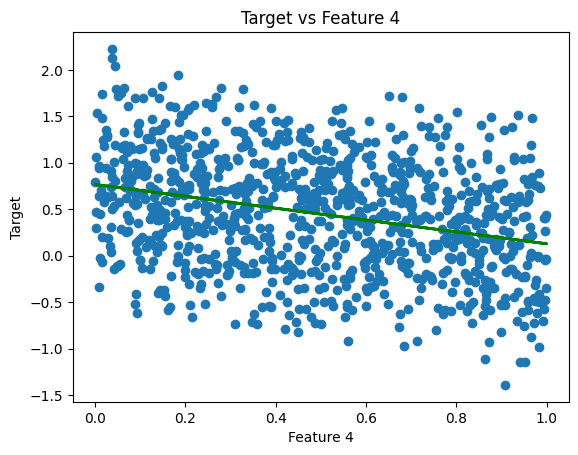

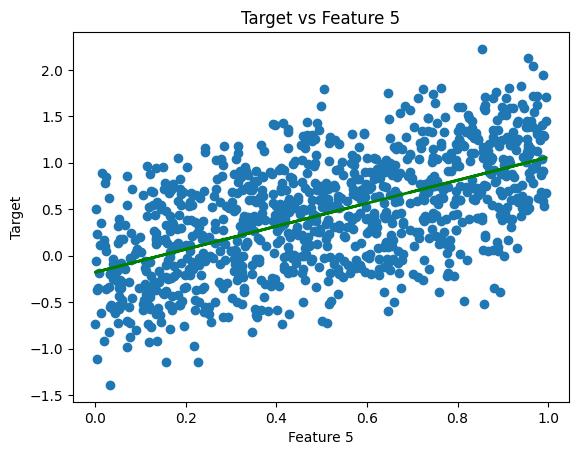

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Generating the dataset
num_samples = 1000
num_features = 5

# random features
X = np.random.rand(num_samples, num_features)

# Generating random coefficients for the linear relationship
true_coefficients = np.random.randn(num_features)

# Generating the target variable
Y = np.dot(X, true_coefficients)

# Plotting the target against each feature column
for i in range(num_features):
    plt.scatter(X[:, i], Y, label=f"Feature {i+1}")

    # best-fit line
    coefficients = np.polyfit(X[:, i], Y, 1)
    best_fit_line = np.poly1d(coefficients)
    
    plt.plot(X[:, i], best_fit_line(X[:, i]), c='red', linewidth=2)

    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Target")
    plt.title(f"Target vs Feature {i+1}")
    plt.show()

Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class. Plot the data.

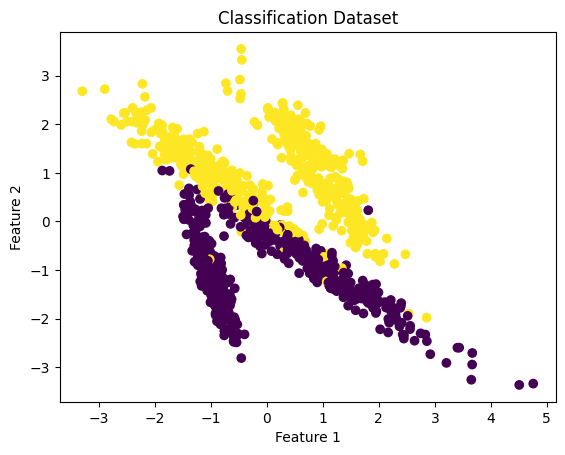

In [31]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# Generate the dataset
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_classes=2, n_clusters_per_class=2, random_state=20)
# Plot the data
plt.scatter(X[:, 0], X[:, 1],c=Y);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.show()


Question 3:
Make a clustering dataset with 2 features and 4 clusters.



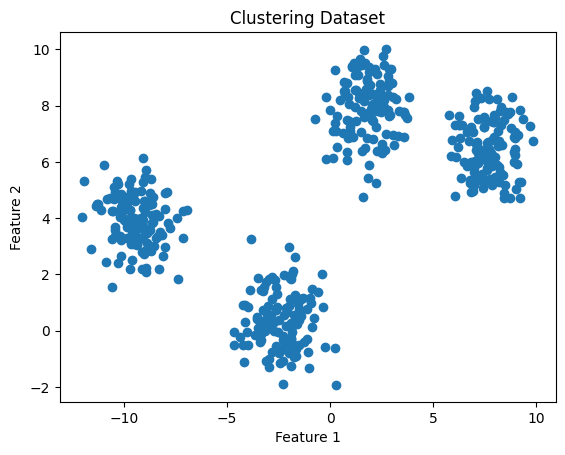

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate the clustering dataset
X, Y = make_blobs(n_samples=500, n_features=2, centers=4,random_state=20)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1]);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.show()

 Question 4:
 Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup. Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered, ActiveCases.

*(Optional Challenge : Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.worldometers.info/coronavirus/'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

# Find the table element containing the data
table = soup.find('table',id='main_table_countries_today')
# Extracting the table headers
headers = [th.text for th in table.find_all('th')]
# Extract the table rows
rows = []
for tr in table.find_all('tr'):
    row = [td.text.strip() for td in tr.find_all('td')]
    if row:
        rows.append(row)
# Converting the data into a Pandas dataframe
df = pd.DataFrame(rows, columns=headers)
# Selecting the desired columns
columns_to_keep = ['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases',
                   'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']
df = df[columns_to_keep]
print(df)

     Country,Other          Continent Population   TotalCases NewCases  \
0    North America      North America             126,645,285            
1             Asia               Asia             217,261,893   +4,097   
2           Europe             Europe             249,247,440      +28   
3    South America      South America              68,671,718            
4          Oceania  Australia/Oceania              14,309,481            
..             ...                ...        ...          ...      ...   
242         Total:      South America              68,671,718            
243         Total:  Australia/Oceania              14,309,481            
244         Total:             Africa              12,823,205            
245         Total:                                        721            
246         Total:                All             688,959,743   +4,125   

    TotalDeaths NewDeaths TotalRecovered NewRecovered ActiveCases  
0     1,632,533              122,485,634   